In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
pd.set_option('display.max_columns',200)
df_train.head(10)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,13.594728,F,2,2.272541,B,D,2.188198,8.213602,13.448277,B,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.

In [5]:
for i in df_train.columns:
    if df_train[i].dtype == 'O':
        print 'Labels in column %s:' % i, len(np.unique(df_train[i]))
        class_mapping = {label:idx for idx,label in enumerate(np.unique(df_train[i]))}
        df_train[i] = df_train[i].map(class_mapping)

Labels in column v3: 4
Labels in column v22: 18211
Labels in column v24: 5
Labels in column v30: 8
Labels in column v31: 4
Labels in column v47: 10
Labels in column v52: 13
Labels in column v56: 123
Labels in column v66: 3
Labels in column v71: 9
Labels in column v74: 3
Labels in column v75: 4
Labels in column v79: 18
Labels in column v91: 8
Labels in column v107: 8
Labels in column v110: 3
Labels in column v112: 23
Labels in column v113: 37
Labels in column v125: 91


/usr/local/lib/python2.7/dist-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [6]:
df_train.isnull().sum()

ID            0
target        0
v1        49832
v2        49796
v3            0
v4        49796
v5        48624
v6        49832
v7        49832
v8        48619
v9        49851
v10          84
v11       49836
v12          86
v13       49832
v14           4
v15       49836
v16       49895
v17       49796
v18       49832
v19       49843
v20       49840
v21         611
v22           0
v23       50675
v24           0
v25       48619
v26       49832
v27       49832
v28       49832
          ...  
v102      51316
v103      49832
v104      49832
v105      48658
v106      49796
v107          0
v108      48624
v109      48624
v110          0
v111      49832
v112          0
v113          0
v114         30
v115      49895
v116      49836
v117      48624
v118      49843
v119      50680
v120      49836
v121      49840
v122      49851
v123      50678
v124      48619
v125          0
v126      49832
v127      49832
v128      48624
v129          0
v130      49843
v131      49895
dtype: int64

In [7]:
print 'Number of samples (rows): %1.f' % len(df_train['v1'])

Number of samples (rows): 114321


In [8]:
df_train_pruned = df_train.dropna(thresh = int(0.75*114321), axis=1)

In [9]:
len(df_train_pruned.columns)

33

In [10]:
df_train_pruned.head()

,ID,target,v3,v10,v12,v14,v21,v22,v24,v30,v31,v34,v38,v40,v47,v50,v52,v56,v62,v66,v71,v72,v74,v75,v79,v91,v107,v110,v112,v113,v114,v125,v129
0,3,1,3,0.503281,6.085711,11.636387,7.730923,16671,2,3,1,7.270147,0,7.711453,2,0.899420,7,86,1,2,4,1,1,3,4,1,5,1,15,0,15.634907,22,0
1,4,1,3,1.312910,6.507647,11.636386,6.763110,7734,2,3,1,3.615077,0,14.305766,4,1.379210,7,102,2,0,4,2,1,3,3,2,2,0,21,18,10.308044,7,0
2,5,1,3,0.765864,6.384670,9.603542,5.245035,7087,4,0,1,4.043864,0,13.077201,2,0.604504,6,18,1,0,1,3,1,1,4,7,3,1,19,0,11.205561,6,2
3,6,1,3,6.542669,9.646653,14.094723,7.517125,1511,3,3,2,8.703550,0,11.523045,2,3.329176,8,48,1,0,4,2,1,3,1,2,2,1,10,0,13.777666,65,1
4,8,1,3,1.050328,6.320087,10.991098,6.414567,8038,4,0,1,6.083151,0,10.138920,8,1.364536,8,0,1,2,4,1,1,3,2,7,3,0,20,18,14.097099,90,0


In [11]:
df_train_pruned.isnull().sum()

ID          0
target      0
v3          0
v10        84
v12        86
v14         4
v21       611
v22         0
v24         0
v30         0
v31         0
v34       111
v38         0
v40       111
v47         0
v50        86
v52         0
v56         0
v62         0
v66         0
v71         0
v72         0
v74         0
v75         0
v79         0
v91         0
v107        0
v110        0
v112        0
v113        0
v114       30
v125        0
v129        0
dtype: int64

In [12]:
X_train = df_train_pruned.iloc[:,2:].values
y_train = df_train_pruned.iloc[:,1].values
#y_train = y_train.reshape(y_train.shape[0],1)

In [13]:
print 'Number of Class 1 :',float(np.count_nonzero(y_train==1))/float(len(y_train))
print 'Number of Class 2 :',float(np.count_nonzero(y_train==0))/float(len(y_train))

Number of Class 1 : 0.761198729892
Number of Class 2 : 0.238801270108


In [14]:
y_train.shape

(114321,)

In [15]:
X_train.shape

(114321, 31)

## Impute missing values

In [16]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr.fit(X_train)
X_train_im = imr.transform(X_train)

In [17]:
X_train

array([[  3.        ,   0.50328147,   6.08571076, ...,  15.6349074 ,
         22.        ,   0.        ],
       [  3.        ,   1.31290992,   6.50764678, ...,  10.30804351,
          7.        ,   0.        ],
       [  3.        ,   0.76586397,   6.38467003, ...,  11.20556132,
          6.        ,   2.        ],
       ..., 
       [  3.        ,   2.07877492,   6.6989251 , ...,   8.89313389,
         81.        ,   2.        ],
       [  3.        ,   1.29102858,   6.69220436, ...,  12.38111312,
         51.        ,   0.        ],
       [  3.        ,   0.85339132,   6.30639645, ...,  14.63529757,
         86.        ,   0.        ]])

In [18]:
X_train_im

array([[  3.        ,   0.50328147,   6.08571076, ...,  15.6349074 ,
         22.        ,   0.        ],
       [  3.        ,   1.31290992,   6.50764678, ...,  10.30804351,
          7.        ,   0.        ],
       [  3.        ,   0.76586397,   6.38467003, ...,  11.20556132,
          6.        ,   2.        ],
       ..., 
       [  3.        ,   2.07877492,   6.6989251 , ...,   8.89313389,
         81.        ,   2.        ],
       [  3.        ,   1.29102858,   6.69220436, ...,  12.38111312,
         51.        ,   0.        ],
       [  3.        ,   0.85339132,   6.30639645, ...,  14.63529757,
         86.        ,   0.        ]])

## Balance the dataset using SMOTE Oversampling

In [72]:
from unbalanced_dataset import SMOTE
ratio = float(np.count_nonzero(y_train==1)) / float(np.count_nonzero(y_train==0))
smote = SMOTE(ratio=ratio, verbose=True, kind='regular')
X_train_smo, y_train_smo = smote.fit_transform(X_train_im, y_train)

Determining classes statistics... 2 classes detected: {0: 27300, 1: 87021}
Finding the 5 nearest neighbours...done!
Creating synthetic samples...Generated 87021 new samples ...
done!


## Standardize the features set

In [73]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [74]:
X_train_std = stdsc.fit_transform(X_train_smo)
X_train_std.shape

(201342, 31)

In [75]:
X_train_std

array([[ 0.17693766, -0.99348856, -0.92892377, ...,  0.88854058,
        -0.98341039, -0.39360391],
       [ 0.17693766, -0.32823782, -0.40622318, ..., -1.2709826 ,
        -1.58210013, -0.39360391],
       [ 0.17693766, -0.77773131, -0.5585686 , ..., -0.90712677,
        -1.62201278,  2.99605324],
       ..., 
       [ 0.17693766, -0.60762614, -0.36843802, ..., -1.51369481,
        -1.09699641, -0.39360391],
       [ 0.17693766,  0.05810822,  0.29844582, ...,  0.30424679,
        -0.41457423,  2.78248188],
       [ 0.17693766, -0.72901363, -0.69098197, ...,  0.89492919,
        -0.28794613, -0.39360391]])

In [76]:
y_train_smo.shape

(201342,)

## Feature Selection w/ L1 Regularization

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train_smo)
print('Training accuracy:', lr.score(X_train_std, y_train_smo))

('Training accuracy:', 0.68398545757964058)


In [25]:
lr.coef_.shape

(1, 31)

In [26]:

weights, params = [],[]

## Iterate over regularization paramter C
for c in np.arange(-4,6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train_smo)
    weights.append(lr.coef_[0])
    params.append(10**c)
    
weights = np.array(weights)

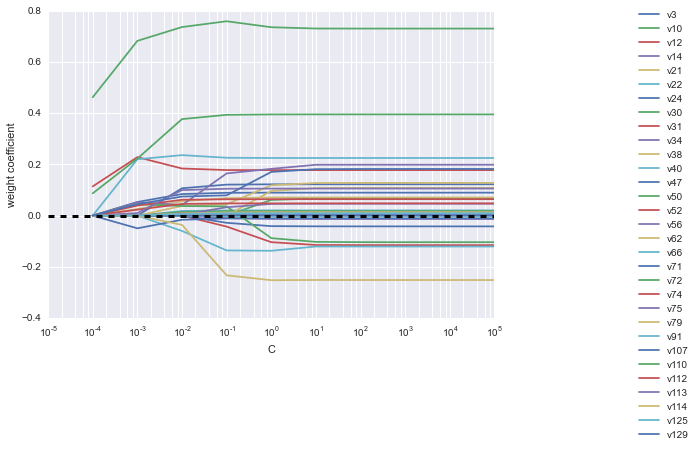

In [28]:
fig = plt.figure()
ax = plt.subplot(111)

for column in range(weights.shape[1]):
    plt.plot(params, weights[:,column], 
             label=df_train_pruned.columns[column+2])
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

## Feature Selection w/ random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
feat_labels = df_train_pruned.columns[2:]

In [32]:
forest = RandomForestClassifier(n_estimators=100,
                                random_state=0,
                                n_jobs=-1)

In [33]:
forest.fit(X_train_smo, y_train_smo)
importances = forest.feature_importances_

In [34]:
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))


 1) v66                            0.084846
 2) v50                            0.084533
 3) v79                            0.050225
 4) v24                            0.043310
 5) v62                            0.040131
 6) v10                            0.039872
 7) v30                            0.038660
 8) v12                            0.037451
 9) v75                            0.037092
10) v22                            0.033936
11) v114                           0.033779
12) v14                            0.033182
13) v91                            0.032835
14) v40                            0.032750
15) v21                            0.032665
16) v34                            0.032068
17) v107                           0.031910
18) v71                            0.030976
19) v47                            0.028891
20) v125                           0.028743
21) v72                            0.026982
22) v52                            0.025744
23) v110                        

(-1, 31)

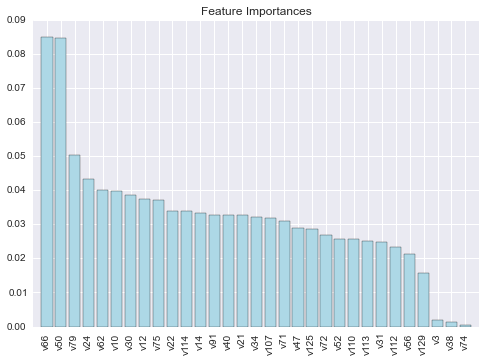

In [35]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])

## Build final training set

In [16]:
df_train_pruned.columns

Index([u'ID', u'target', u'v3', u'v10', u'v12', u'v14', u'v21', u'v22', u'v24',
       u'v30', u'v31', u'v34', u'v38', u'v40', u'v47', u'v50', u'v52', u'v56',
       u'v62', u'v66', u'v71', u'v72', u'v74', u'v75', u'v79', u'v91', u'v107',
       u'v110', u'v112', u'v113', u'v114', u'v125', u'v129'],
      dtype='object')

In [17]:
features_list = \
['target',
'v66',
'v50',
'v79',
'v24',
'v62',
'v10',
'v30',
'v12',
'v75',
'v22',
'v114',
'v14',
'v91',
'v40',
'v21',
'v34',
'v107',
'v71',
'v47',
'v125',
'v72',
'v52',
'v110',
'v113',
'v31',
'v112',
'v56',
'v129',
]

In [18]:
df_train_slimmed = df_train_pruned[features_list]

In [19]:
df_train_slimmed.head()

,target,v66,v50,v79,v24,v62,v10,v30,v12,v75,v22,v114,v14,v91,v40,v21,v34,v107,v71,v47,v125,v72,v52,v110,v113,v31,v112,v56,v129
0,1,2,0.899420,4,2,1,0.503281,3,6.085711,3,16671,15.634907,11.636387,1,7.711453,7.730923,7.270147,5,4,2,22,1,7,1,0,1,15,86,0
1,1,0,1.379210,3,2,2,1.312910,3,6.507647,3,7734,10.308044,11.636386,2,14.305766,6.763110,3.615077,2,4,4,7,2,7,0,18,1,21,102,0
2,1,0,0.604504,4,4,1,0.765864,0,6.384670,1,7087,11.205561,9.603542,7,13.077201,5.245035,4.043864,3,1,2,6,3,6,1,0,1,19,18,2
3,1,0,3.329176,1,3,1,6.542669,3,9.646653,3,1511,13.777666,14.094723,2,11.523045,7.517125,8.703550,2,4,2,65,2,8,1,0,2,10,48,1
4,1,2,1.364536,2,4,1,1.050328,0,6.320087,3,8038,14.097099,10.991098,7,10.138920,6.414567,6.083151,3,4,8,90,1,8,0,18,1,20,0,0


In [20]:
X_train, y_train = df_train_slimmed.iloc[:,1:].values, df_train_slimmed.iloc[:,0].values

In [21]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN',strategy='mean', axis=0)
imr = imr.fit(X_train)
X_train = imr.transform(X_train)

In [22]:
from unbalanced_dataset import SMOTE
ratio = float(np.count_nonzero(y_train==1)) / float(np.count_nonzero(y_train==0))
smote = SMOTE(ratio=ratio, verbose=True, kind='regular')
X_train, y_train = smote.fit_transform(X_train, y_train)

Determining classes statistics... 2 classes detected: {0: 27300, 1: 87021}
Finding the 5 nearest neighbours...done!
Creating synthetic samples...Generated 87021 new samples ...
done!


In [23]:
X_train.shape

(201342, 28)

In [24]:
y_train.shape

(201342,)

In [25]:
np.unique(y_train)

array([ 0.,  1.])

In [26]:
X_train_sub = X_train[:int(0.1*X_train.shape[0])]
y_train_sub = y_train[:int(0.1*X_train.shape[0])]

In [27]:
X_train_sub.shape

(20134, 28)

## Logistic Regression

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)

In [30]:
X_train

array([[  2.00000000e+00,   8.99420004e-01,   4.00000000e+00, ...,
          1.50000000e+01,   8.60000000e+01,   0.00000000e+00],
       [  0.00000000e+00,   1.37921007e+00,   3.00000000e+00, ...,
          2.10000000e+01,   1.02000000e+02,   0.00000000e+00],
       [  0.00000000e+00,   6.04504083e-01,   4.00000000e+00, ...,
          1.90000000e+01,   1.80000000e+01,   2.00000000e+00],
       ..., 
       [  7.35191922e-01,   2.72616482e-01,   2.73519192e+00, ...,
          6.00000000e+00,   6.12334546e+01,   0.00000000e+00],
       [  9.82526265e-01,   7.54885620e-01,   2.03494747e+00, ...,
          1.58252627e+01,   1.22316144e-01,   1.74737348e-02],
       [  1.79552786e+00,   1.59245397e-01,   2.10223607e+00, ...,
          9.48881964e+00,   4.98402493e+01,   0.00000000e+00]])

In [31]:
X_train_std

array([[ 1.94814252, -0.37751637, -0.02593873, ...,  0.96695699,
         0.73899719, -0.39334732],
       [-0.75782664,  0.09463331, -0.31037729, ...,  2.03973676,
         1.18566955, -0.39334732],
       [-0.75782664, -0.66773592, -0.02593873, ...,  1.68214351,
        -1.15936033,  2.99315646],
       ..., 
       [ 0.23687669, -0.9943384 , -0.38569892, ..., -0.64221267,
         0.04758899, -0.39334732],
       [ 0.57151624, -0.51974913, -0.58487544, ...,  1.11451117,
        -1.65845203, -0.36375988],
       [ 1.67149486, -1.10590412, -0.56573596, ..., -0.01842348,
        -0.27047538, -0.39334732]])

In [32]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression(penalty='l2', C=0.1)
lr.fit(X_train_std,y_train)
print 'Training accuracy:', lr.score(X_train_std, y_train)

Training accuracy: 0.683657657121


In [35]:
lr.intercept_

array([-0.25845353])

In [36]:
lr.coef_.shape

(1, 28)

In [37]:
from sklearn.learning_curve import validation_curve

In [38]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

In [39]:
train_scores, test_scores = validation_curve(estimator=lr,
                                            X=X_train_std,
                                            y=y_train,
                                            param_name='C',
                                            param_range=param_range,
                                            cv=10)

(0.55, 0.8)

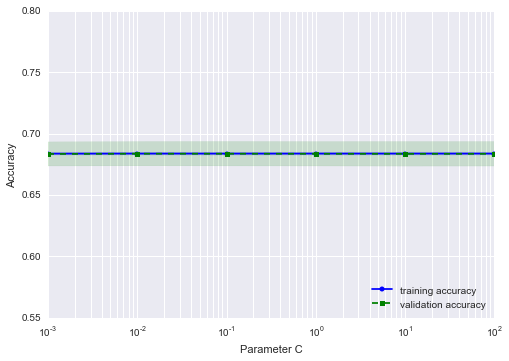

In [42]:
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.55,0.8])

[[95594 18727]
 [44965 42056]]


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2645: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


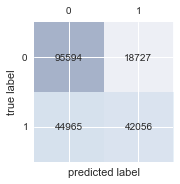

In [41]:
from sklearn.metrics import confusion_matrix
#lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_train_std)
confmat = confusion_matrix(y_true=y_train, y_pred=y_pred)
print (confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

### So logistic regression isn't doing a great job. Let's try another model.

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
forest = RandomForestClassifier(n_estimators=100, 
                                random_state=0,
                                #class_weight='balanced',
                                n_jobs=-1)

In [30]:
forest.fit(X_train_sub,y_train_sub)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
y_train_pred = forest.predict(X_train_sub)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print 'Random Forest training accuracy %.3f' % (accuracy_score(y_train_sub,y_train_pred))

Random Forest training accuracy 1.000


[[ 4876     0]
 [    0 15258]]


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2645: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


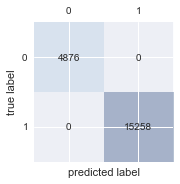

In [35]:
from sklearn.metrics import confusion_matrix
#lr.fit(X_train_std, y_train)
y_pred = forest.predict(X_train_sub)
confmat = confusion_matrix(y_true=y_train_sub, y_pred=y_pred)
print (confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

## Boosted decision tree

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=0,
                              max_depth=None,
                              #class_weight='balanced',
                              min_samples_leaf = 2)

ada = AdaBoostClassifier(base_estimator=tree, 
                         n_estimators=10,
                         learning_rate=0.1,
                         random_state=0)

In [38]:
tree = tree.fit(X_train_sub,y_train_sub)

In [39]:
y_train_pred = tree.predict(X_train_sub)

In [40]:
tree_train = accuracy_score(y_train_sub, y_train_pred)
print 'Decision training accuracy %.3f' % (tree_train)

Decision training accuracy 0.974


In [41]:
ada = ada.fit(X_train_sub, y_train_sub)

In [42]:
y_train_pred = ada.predict(X_train_sub)

In [43]:
ada_train = accuracy_score(y_train_sub, y_train_pred) 
print 'AdaBoost training accuracy %.3f' % (ada_train)

AdaBoost training accuracy 1.000


In [44]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=0, splitter='best'),
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_samples_leaf': 2,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': 0,
 'base_estimator__splitter': 'best',
 'learning_rate': 0.1,
 'n_estimators': 10,
 'random_state': 0}

## Model evaluation and hyperparameter tuning

In [ ]:
from sklearn.grid_search import GridSearchCV

In [ ]:
params = {'base_estimator__max_depth':[1,10,None],'n_estimators':[5,10,20,50,100]}

In [ ]:
#grid = GridSearchCV(estimator=ada, 
#                    param_grid=params,
#                    cv=10,
#                    scoring='accuracy')

In [ ]:
#grid.fit(X_train, y_train)

In [ ]:
import pickle

In [ ]:
#with open('grid_search.pkl','wb') as handle:
#    pickle.dump(grid,handle)

In [ ]:
#grid.best_estimator_

In [ ]:
#print grid.best_score_

In [ ]:
#print grid.best_params_

In [ ]:
#for params, mean_score, scores in grid.grid_scores_:
#    print("%0.3f+/-%0.2f %r"
#            % (mean_score, scores.std() / 2, params))

In [ ]:
#print('Best parameters: %s' % grid.best_params_)
#print('Accuracy: %.2f' % grid.best_score_)

In [45]:
tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=0,
                              max_depth=10,
                              #class_weight='balanced',
                              min_samples_leaf = 2)

ada = AdaBoostClassifier(base_estimator=tree, 
                         n_estimators=10,
                         learning_rate=0.1,
                         random_state=0)

tree = tree.fit(X_train_sub,y_train_sub)
y_train_pred = tree.predict(X_train_sub)
tree_train = accuracy_score(y_train_sub, y_train_pred)
print 'Decision training accuracy %.3f' % (tree_train)
ada.fit(X_train_sub, y_train_sub)

Decision training accuracy 0.802


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
          learning_rate=0.1, n_estimators=10, random_state=0)

In [46]:
y_train_pred = ada.predict(X_train_sub)
ada_train = accuracy_score(y_train_sub, y_train_pred) 
print 'AdaBoost training accuracy %.3f' % (ada_train)

AdaBoost training accuracy 0.911


In [47]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
             max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=0, splitter='best'),
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 10,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_samples_leaf': 2,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': 0,
 'base_estimator__splitter': 'best',
 'learning_rate': 0.1,
 'n_estimators': 10,
 'random_state': 0}

In [48]:
from sklearn.learning_curve import validation_curve

In [49]:
param_range = [1,5,10,15,20]
train_scores, test_scores = validation_curve(estimator=ada,
                                             X=X_train_sub,
                                             y=y_train_sub,
                                             param_name='base_estimator__max_depth',
                                             param_range=param_range,
                                             cv=10, 
                                             verbose=True, 
                                             n_jobs=-1)

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


In [50]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [82]:
import pickle
with open('train_mean_depth.pkl','wb') as handle:
    pickle.dump(train_mean,handle)
with open('train_std_depth.pkl','wb') as handle:
    pickle.dump(train_std,handle)
with open('test_mean_depth.pkl','wb') as handle:
    pickle.dump(test_mean,handle)
with open('test_std_depth.pkl','wb') as handle:
    pickle.dump(test_std,handle)

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


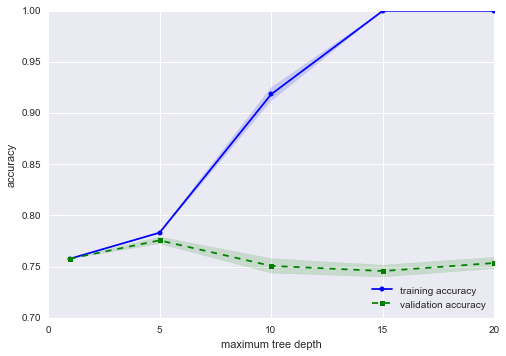

In [51]:
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.legend(loc='lower right')
plt.xlabel('maximum tree depth')
plt.ylabel('accuracy')

In [52]:
tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=0,
                              max_depth=5,
                              #class_weight='balanced',
                              min_samples_leaf = 2)

ada = AdaBoostClassifier(base_estimator=tree, 
                         n_estimators=1,
                         learning_rate=0.1,
                         random_state=0)

tree = tree.fit(X_train_sub,y_train_sub)
y_train_pred = tree.predict(X_train_sub)
tree_train = accuracy_score(y_train_sub, y_train_pred)
print 'Decision training accuracy %.3f' % (tree_train)
ada.fit(X_train_sub, y_train_sub)

Decision training accuracy 0.777


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
          learning_rate=0.1, n_estimators=1, random_state=0)

In [53]:
from sklearn.learning_curve import validation_curve
param_range = [1,5,10,50,100,250,500,1000]
train_scores, test_scores = validation_curve(estimator=ada,
                                             X=X_train_sub,
                                             y=y_train_sub,
                                             param_name='n_estimators',
                                             param_range=param_range,
                                             cv=10, 
                                             verbose=True, 
                                             n_jobs=-1)

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 68.6min finished


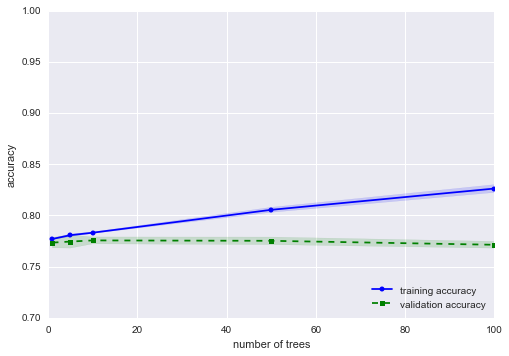

In [55]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.xlim([0,100])
plt.legend(loc='lower right')
plt.xlabel('number of trees')
plt.ylabel('accuracy')

## Applying GBT to the full data set

In [56]:
tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=0,
                              max_depth=5,
                              #class_weight='balanced',
                              min_samples_leaf = 2)

ada = AdaBoostClassifier(base_estimator=tree, 
                         n_estimators=50,
                         learning_rate=0.1,
                         random_state=0)

tree = tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
tree_train = accuracy_score(y_train, y_train_pred)
print 'Decision training accuracy %.3f' % (tree_train)
ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
ada_train = accuracy_score(y_train, y_train_pred)
print 'Adaboost training accuracy %.3f' % (ada_train)

Decision training accuracy 0.745
Adaboost training accuracy 0.870


[[91714 22607]
 [ 3588 83433]]


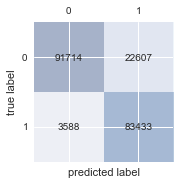

In [57]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
print (confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

In [64]:
from sklearn.metrics import log_loss
print 'Log-loss: %.3f' % log_loss(y_train,y_train_pred)
print 'Loss: %.3f' % np.exp(-log_loss(y_train,y_train_pred))

Log-loss: 4.494
Loss: 0.011


## Applying the GBT model on the test set

In [87]:
df_test = pd.read_csv('test.csv')

In [88]:
pd.set_option('display.max_columns',200)
df_test.head(10)

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,1.375465e+00,11.361141,C,4.200778,6.577000,2.081784,1.784386,0.011094,9.523810,1.312911,16.851853,6.961173,3.107462,12.230137,1.773050,2.857142,3.493816,0.096826,0.225481,17.910227,7.437806,AFPB,9.558310e-07,E,0.069180,0.954152,4.386616,0.573017,6.988848,NaN,A,1.115242,2.081784,5.228503,8.178438,12.183225,8.333339e-01,0,2.842768e+00,11.754576,6.765800,10.855019,1.296297,10.613377,9.417172,0.100480,J,12.774528,7.509293,0.118847,8.590755,C,17.021277,0.044313,1.338291,AF,2.602230,2.919712e-01,9.038609,0.817843,14.911512,1,0.091466,5.967949,15.611474,A,8.029739,15.912409,8.571429,11.222210,F,1,1.929013,B,D,2.146860,6.171004,15.714287,Q,1.904761,8.918731,8.750729,2.453532,0.892192,1.860465,0.892193,7.904968,1.784387,0.105298,0.988980,B,0.658269,4.929298,2.992365,0.759955,5.947955,4.999999,10.013503,0.817844,19.708030,4.186787,1.873945,4.129022,1.701894,0.004535,11.688117,B,1.502480,2.121710,A,3.568773,U,NaN,12.246698,11.428572,1.276596,4.777902,5.833334,-9.974950e-07,1.459854,3.267328,7.619048,1.815241,1.112270e-07,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,1.291029,NaN,6.618289,NaN,10.760796,NaN,NaN,NaN,NaN,NaN,NaN,5.895192,FOG,NaN,D,NaN,NaN,NaN,NaN,NaN,A,A,NaN,NaN,8.387431,NaN,NaN,NaN,4,NaN,6.737574,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,1.027070,NaN,A,NaN,NaN,NaN,DI,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,F,5,NaN,B,D,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN,B,NaN,E,NaN,16.284938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,NaN,0,NaN,NaN
2,2,-4.903407e-07,8.201529,C,4.544371,6.550100,1.558442,2.467532,0.007164,7.142858,1.575492,15.142858,6.894249,1.899789,13.306189,1.302083,3.333334,3.177414,0.070676,0.172391,17.537549,8.253452,HXZ,-2.137218e-07,B,0.059620,2.857142,2.207792,0.327134,8.311689,C,A,0.974026,1.558442,7.958990,8.311689,12.195123,-5.249334e-07,0,6.707352e+00,7.701325,6.883118,12.077923,3.428570,10.215687,7.908401,0.082194,I,12.770831,7.792207,0.840731,9.885153,A,15.000000,0.020126,0.779222,DO,5.454544,-8.476044e-07,9.452010,2.857142,15.561143,1,0.083718,5.633655,15.778656,C,9.090908,13.200000,6.666666,7.860585,F,1,1.488096,B,D,1.910292,5.714285,16.666667,C,1.428572,8.952301,8.744891,1.948051,0.779221,1.860465,0.779221,5.886226,5.714285,0.043851,0.918734,C,0.552642,4.350983,3.163664,0.604966,6.233767,12.631578,10.214574,0.952380,19.799999,6.535555,0.762963,4.917534,1.981859,0.002794,11.747048,D,1.188768,2.088817,A,3.116883,Q,AJ,15.622710,13.333334,3.750001,4.740574,12.631580,4.910660e-08,0.600000,2.500001,5.714286,1.970928,1.412265e-02,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,2.661870e+00,3.041241,C,1.657216,9.773080,2.078337,1.430855,1.252157,7.959596,1.575493,14.424357,6.856236,5.086604,10.397026,2.803497,7.302904,1.121984,0.608524,0.476554,15.285588,5.539484,AGMU,5.863396e-07,E,1.779993,1.406875,1.350919,5.347444,6.474820,E,A,2.362111,3.852918,6.223849,6.634692,13.741929,2.011174e+00,0,8.248888e-07,10.444974,6.059153,13.189448,1.826832,7.635934,12.850679,1.504218,I,16.791675,7.801759,0.946373,8.578365,A,15.382717,1.351259,3.812951,CN,4.356514,1.953542e+01,10.425885,1.128431,10.935236,1,1.809689,2.181748,12.366115,B,8.401279,17.677120,13.195021,14.124303,F,1,3.905010,B,D,0.644581,6.370902,11.203320,C,3.555555,6.284919,3.264427,3.237409,4.220623,6.000001,1.306954,13.037068,0.431654,2.035947,1.495102,B,0.775499

In [ ]:
features_list = ['v50','v12','v21','v22',
                 'v114','v34','v10','v40','v14','v125',
                 'v112','v52']
df_test_slimmed = df_test[features_list]

In [94]:
for i in df_test_slimmed.columns:
    if df_test_slimmed[i].dtype == 'O':
        print 'Labels in column %s:' % i, len(np.unique(df_test_slimmed[i]))
        class_mapping = {label:idx for idx,label in enumerate(np.unique(df_test_slimmed[i]))}
        df_test_slimmed[i] = df_test_slimmed[i].map(class_mapping)

Labels in column v22: 18253


/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Labels in column v125: 91
Labels in column v112: 23
Labels in column v52: 13


In [95]:
df_test_slimmed.head(10)

,v50,v12,v21,v22,v114,v34,v10,v40,v14,v125,v112,v52
0,0.118847,6.961173,7.437806,3041,12.246698,5.228503,1.312911,11.754576,12.230137,7,21,3
1,1.027070,6.618289,5.895192,7095,16.284938,8.387431,1.291029,6.737574,10.760796,73,5,1
2,0.840731,6.894249,8.253452,8385,15.622710,7.958990,1.575492,7.701325,13.306189,23,17,1
3,0.946373,6.856236,5.539484,3541,13.701587,6.223849,1.575493,10.444974,10.397026,28,6,1
4,1.493654,6.273627,6.741530,4541,13.395401,5.476858,1.050328,11.097606,11.354501,1,1,8
5,0.491526,6.344974,7.210579,12479,9.275629,2.915391,0.656456,14.751464,11.268329,41,9,4
6,3.119359,6.443916,4.090771,4284,15.866593,7.809384,2.078774,8.444397,9.522445,66,12,12
7,0.500330,6.052550,7.930243,2751,7.571114,1.857987,0.262583,16.027060,10.991098,38,9,7
8,0.944905,9.540419,8.439870,6736,9.529026,5.816583,5.229759,14.766660,14.775679,36,3,1
9,1.669723,6.210270,6.985110,16608,17.353092,9.209334,1.050329,5.195717,11.636386,15,21,2


In [97]:
X_test= df_test_slimmed[:]

In [98]:
X_test.shape

(114393, 12)

In [ ]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr.fit(X_test)
X_test = imr.transform(X_test)

## Neural Network

In [28]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
print 'Rows: %d, columns %d' % (X_train_std.shape[0], X_train_std.shape[1])

Rows: 201342, columns 28


In [29]:
import numpy as np
import theano

In [30]:
theano.config.floatX = 'float32'
X_train_std = X_train_std.astype(theano.config.floatX)

In [31]:
from keras.utils import np_utils

In [32]:
## one-hot encoding
y_train_ohe = np_utils.to_categorical(y_train)

In [33]:
y_train_ohe.shape

(201342, 2)

In [34]:
print '\nFirst 3 labels (one-hot):\n', y_train_ohe[:3]


First 3 labels (one-hot):
[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]


In [35]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

Using Theano backend.


In [50]:
np.random.seed(1)

In [51]:
## Add layers
model = Sequential()
## input layer
model.add(Dense(input_dim=X_train_std.shape[1],
                output_dim=28,
                init='uniform',
                activation='tanh'))

## 3 hidden layers
model.add(Dense(input_dim=28,
                output_dim=28,
                init='uniform',
                activation='tanh'))

model.add(Dense(input_dim=28,
                output_dim=y_train_ohe.shape[1],
                init='uniform',
                activation='softmax'))

In [52]:
## Stochastic gradient descent optmization
sgd = SGD(lr=0.1, decay=1e-6, momentum=.9,nesterov=True)

In [53]:
model.compile(loss='binary_crossentropy', optimizer=sgd)

In [54]:
## train the model
model.fit(X_train_std, y_train_ohe, nb_epoch=50, batch_size=100, 
          verbose=1, validation_split=0.1, show_accuracy=True)

Train on 181207 samples, validate on 20135 samples
Epoch 1/50
181207/181207 [==============================] - 6s - loss: 0.5700 - acc: 0.6964 - val_loss: 0.3475 - val_acc: 0.8493
Epoch 2/50
181207/181207 [==============================] - 6s - loss: 0.4839 - acc: 0.7428 - val_loss: 0.4382 - val_acc: 0.7330
Epoch 3/50
181207/181207 [==============================] - 6s - loss: 0.4617 - acc: 0.7542 - val_loss: 0.3611 - val_acc: 0.7793
Epoch 4/50
181207/181207 [==============================] - 7s - loss: 0.4506 - acc: 0.7596 - val_loss: 0.2771 - val_acc: 0.8583
Epoch 5/50
181207/181207 [==============================] - 6s - loss: 0.4432 - acc: 0.7641 - val_loss: 0.3425 - val_acc: 0.7911
Epoch 6/50
181207/181207 [==============================] - 7s - loss: 0.4340 - acc: 0.7722 - val_loss: 0.2619 - val_acc: 0.8553
Epoch 7/50
181207/181207 [==============================] - 6s - loss: 0.4241 - acc: 0.7778 - val_loss: 0.3582 - val_acc: 0.7529
Epoch 8/50
181207/181207 [====================

In [55]:
y_train_pred = model.predict_classes(X_train_std,verbose=0)

In [56]:
train_acc = np.sum(y_train==y_train_pred,axis=0)/float(X_train.shape[0])
print 'Training accuracy: %.2f%%' % (train_acc*100)

Training accuracy: 82.12%
